In [1]:
import pandas as pd
import geopandas

In [52]:
file_path = 'Datasets/Population_VNM_2020_1km_Aggregated_UNadj.csv'
pop = pd.read_csv(file_path)

In [56]:
pop = geopandas.GeoDataFrame(
    pop, geometry=geopandas.points_from_xy(pop.X, pop.Y))

<AxesSubplot:>

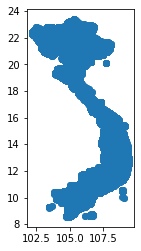

In [58]:
pop.plot()

In [4]:
vietnamBoundaries = geopandas.read_file('Datasets/Vietnam_Administrative_Boundaries.geojson')

In [5]:
vietnamBoundaries.head(2)

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((105.37450 10.24604, 105.33623 10.234..."
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((105.41638 9.01717, 105.41731 9.02926..."


In [6]:
vietnamBoundaries

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,VNM,Vietnam,VNM.1_1,An Giang,An Giang,None,Tỉnh,Province,None,VN.AG,"POLYGON ((105.37450 10.24604, 105.33623 10.234..."
1,VNM,Vietnam,VNM.2_1,Bạc Liêu,Bac Lieu,None,Tỉnh,Province,None,VN.BL,"POLYGON ((105.41638 9.01717, 105.41731 9.02926..."
2,VNM,Vietnam,VNM.3_1,Bắc Giang,Bac Giang,None,Tỉnh,Province,None,VN.BG,"POLYGON ((105.96444 21.23003, 105.96074 21.230..."
3,VNM,Vietnam,VNM.4_1,Bắc Kạn,Bac Kan,None,Tỉnh,Province,None,VN.BK,"POLYGON ((105.59045 22.00770, 105.58698 22.003..."
4,VNM,Vietnam,VNM.5_1,Bắc Ninh,Bac Ninh,None,Tỉnh,Province,None,VN.BN,"POLYGON ((106.02851 20.99314, 106.02468 20.996..."
...,...,...,...,...,...,...,...,...,...,...,...
1249,VNM,Vietnam,VNM.59_1,Trà Vinh,Tra Vinh,None,Tỉnh,Province,None,VN.TV,"POLYGON ((106.50567 9.56151, 106.48796 9.55054..."
1250,VNM,Vietnam,VNM.60_1,Tuyên Quang,Tuyen Quang,None,Tỉnh,Province,None,VN.TQ,"POLYGON ((105.45863 21.51856, 105.45708 21.517..."
1251,VNM,Vietnam,VNM.61_1,Vĩnh Long,Vinh Long,None,Tỉnh,Province,None,VN.VL,"POLYGON ((106.11272 9.93837, 106.10242 9.94895..."
1252,VNM,Vietnam,VNM.62_1,Vĩnh Phúc,Vinh Phuc,None,Tỉnh,Province,None,VN.VC,"POLYGON ((105.71557 21.22469, 105.71361 21.222..."


In [7]:
hospitals = geopandas.read_file('Datasets/Hospitals_VNM.geojson')

In [109]:
hospitals["X"] = hospitals.centroid.x
hospitals["Y"] = hospitals.centroid.y

<ipython-input-109-2f19d28adbbb>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospitals["X"] = hospitals.centroid.x
<ipython-input-109-2f19d28adbbb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hospitals["Y"] = hospitals.centroid.y


In [8]:
hospitals.head(2)

,full_id,osm_id,osm_type,amenity,building,name,type,addr_city,addr_distr,addr_house,...,barrier,name:es,access,traffic_calming,entrance,addr:ward,motor_vehicle,crossing,path,geometry
0,r7247040,7247040,relation,hospital,yes,B???nh Vi???n ??a Khoa Long An,multipolygon,None,None,None,...,None,None,None,None,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (106.42624 10.53229)
1,r7778108,7778108,relation,hospital,yes,B???nh Vi???n ??a Khoa T??nh Ph?? Y??n,multipolygon,None,None,None,...,None,None,None,None,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (109.29928 13.10932)


<AxesSubplot:>

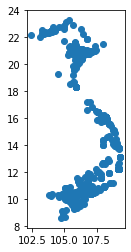

In [9]:
hospitals.plot()

In [10]:
roadNetwork = geopandas.read_file('Datasets/Road_Network_VNM.geojson')

In [50]:
roadNetwork.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   f_code    4535 non-null   object  
 1   acc       4535 non-null   int64   
 2   exs       4535 non-null   int64   
 3   med       4535 non-null   int64   
 4   rtt       4535 non-null   int64   
 5   rsu       4535 non-null   int64   
 6   loc       4535 non-null   int64   
 7   soc       4535 non-null   object  
 8   rst       4535 non-null   int64   
 9   geometry  4535 non-null   geometry
 10  points    4535 non-null   object  
dtypes: geometry(1), int64(7), object(3)
memory usage: 389.9+ KB


<AxesSubplot:>

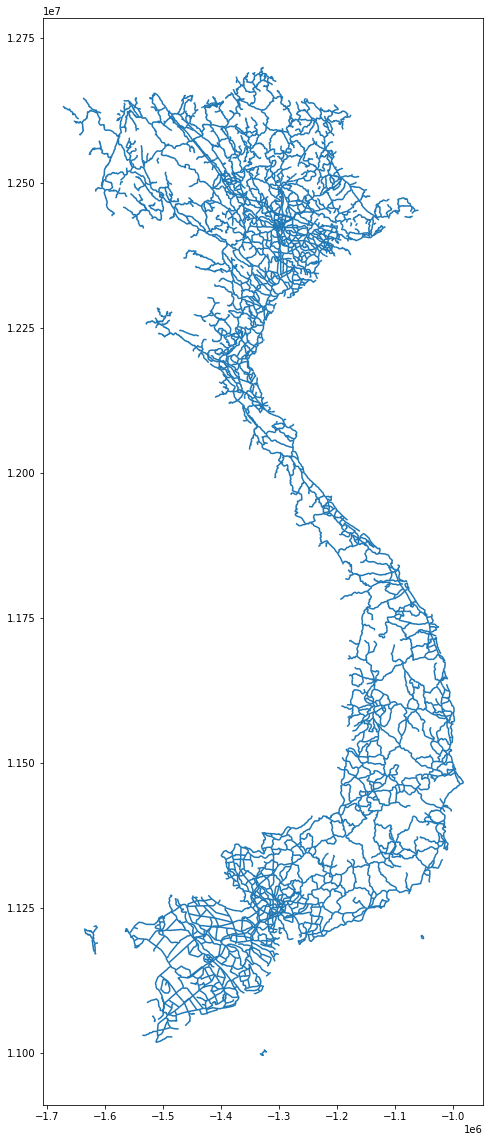

In [51]:
roadNetwork.plot(figsize=(20,20))

In [12]:
roadNetwork.head(2)

,f_code,acc,exs,med,rtt,rsu,loc,soc,rst,geometry
0,AP030,1,28,0,999,1,8,VNM,1,"LINESTRING (-1324896.810 11005706.981, -132519..."
1,AP030,1,28,0,999,1,8,VNM,2,"LINESTRING (-1512457.120 11017791.650, -151150..."


In [13]:
roadNetwork['points'] = roadNetwork.apply(lambda x: [y for y in x['geometry'].coords], axis=1)

In [14]:
roadNetwork.head(5)

,f_code,acc,exs,med,rtt,rsu,loc,soc,rst,geometry,points
0,AP030,1,28,0,999,1,8,VNM,1,"LINESTRING (-1324896.810 11005706.981, -132519...","[(-1324896.8100718018, 11005706.980635073), (-..."
1,AP030,1,28,0,999,1,8,VNM,2,"LINESTRING (-1512457.120 11017791.650, -151150...","[(-1512457.1196527877, 11017791.649970286), (-..."
2,AP030,1,28,0,999,1,8,VNM,2,"LINESTRING (-1493643.977 11027505.705, -149304...","[(-1493643.9765005666, 11027505.704598242), (-..."
3,AP030,1,28,0,14,1,8,VNM,2,"LINESTRING (-1512457.120 11017791.650, -151123...","[(-1512457.1196527877, 11017791.649970286), (-..."
4,AP030,1,28,0,999,1,8,VNM,2,"LINESTRING (-1509640.460 11037037.887, -151075...","[(-1509640.4599902316, 11037037.887330119), (-..."


In [15]:
from pyrosm import OSM

In [16]:
from pyrosm import get_data

In [18]:
import osmnx as ox

In [19]:
network = ox.graph_from_xml('Datasets/highways2.osm')

In [ ]:
#nodes, edges = roadNetwork.get_network(nodes=True,network_type="driving")

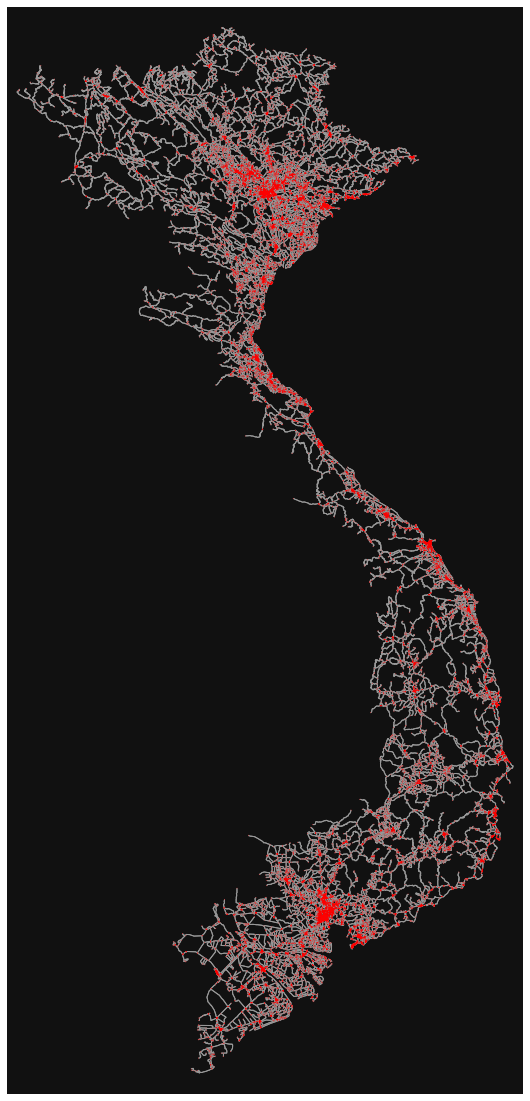

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [49]:
ox.plot_graph(network, figsize = (20,20), node_color='red', node_alpha=0.5, node_size=1)

In [33]:
import networkx as nx

In [178]:
import pandana

In [31]:
print(network)

MultiDiGraph with 44647 nodes and 105163 edges


In [35]:
orig

75617751

In [36]:
dest

9120652278

In [38]:
geoVietnamRoads = ox.graph_to_gdfs(network, nodes=True)

In [45]:
geoVietnamRoadsDF = geoVietnamRoads[0].reset_index()

In [46]:
geoVietnamRoadsDF

,osmid,y,x,highway,ref,geometry
0,75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
1,75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)
2,76483008,21.080720,105.788689,NaN,NaN,POINT (105.78869 21.08072)
3,80399585,10.702306,105.108761,NaN,NaN,POINT (105.10876 10.70231)
4,81804025,21.027742,105.834221,NaN,NaN,POINT (105.83422 21.02774)
...,...,...,...,...,...,...
44642,9115673217,22.835425,106.529890,NaN,NaN,POINT (106.52989 22.83543)
44643,9115673220,22.836572,106.528676,NaN,NaN,POINT (106.52868 22.83657)
44644,9115673228,22.837678,106.527039,NaN,NaN,POINT (106.52704 22.83768)
44645,9115673344,22.815539,106.779454,NaN,NaN,POINT (106.77945 22.81554)


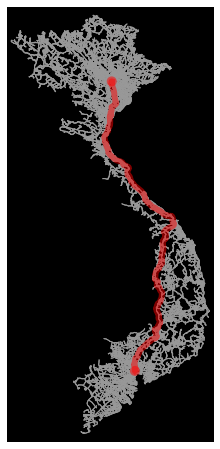

In [34]:
orig = list(network)[0]
dest = list(network)[-1]
route = nx.shortest_path(network, orig, dest, weight='length')
fig, ax = ox.plot_graph_route(network, route, route_linewidth=6, node_size=0, bgcolor='k')

In [63]:
from sklearn.neighbors import BallTree

In [83]:
import numpy as np

In [86]:
geoVietnamRoadsDF

,osmid,y,x,highway,ref,geometry
0,75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
1,75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)
2,76483008,21.080720,105.788689,NaN,NaN,POINT (105.78869 21.08072)
3,80399585,10.702306,105.108761,NaN,NaN,POINT (105.10876 10.70231)
4,81804025,21.027742,105.834221,NaN,NaN,POINT (105.83422 21.02774)
...,...,...,...,...,...,...
44642,9115673217,22.835425,106.529890,NaN,NaN,POINT (106.52989 22.83543)
44643,9115673220,22.836572,106.528676,NaN,NaN,POINT (106.52868 22.83657)
44644,9115673228,22.837678,106.527039,NaN,NaN,POINT (106.52704 22.83768)
44645,9115673344,22.815539,106.779454,NaN,NaN,POINT (106.77945 22.81554)


In [95]:
nodes = ox.graph_to_gdfs(network,nodes=True,edges=False)

In [96]:
nodes.head()

,y,x,highway,ref,geometry
osmid,,,,,
75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)
76483008,21.080720,105.788689,NaN,NaN,POINT (105.78869 21.08072)
80399585,10.702306,105.108761,NaN,NaN,POINT (105.10876 10.70231)
81804025,21.027742,105.834221,NaN,NaN,POINT (105.83422 21.02774)


In [91]:
edges = ox.graph_to_gdfs(network,nodes=False,edges=True)

In [102]:
hospitals['geometry']

0      POINT (106.42624 10.53229)
1      POINT (109.29928 13.10932)
2      POINT (106.71826 10.73249)
3      POINT (105.85027 21.02464)
4      POINT (108.20728 16.05423)
                  ...            
946    POINT (105.81999 21.00850)
947    POINT (105.81979 21.00876)
948    POINT (107.58787 16.46348)
949    POINT (105.55699 21.10371)
950    POINT (105.84764 21.24987)
Name: geometry, Length: 951, dtype: geometry

In [130]:
### finding the nearest network nodes to each hospital
origin_node, euclidean_distance = ox.distance.nearest_nodes(G=network,X=hospitals['X'], Y=hospitals['Y'],return_dist=True)

In [132]:
pop.head(2)

,X,Y,Z,geometry
0,105.319582923400034,23.3954167719771462,56.8017578125,POINT (105.31958 23.39542)
1,105.29458292350003,23.3870834386771485,69.8211898803710938,POINT (105.29458 23.38708)


In [140]:
pop['X'] = pop['X'].astype(float)
pop['Y'] = pop['Y'].astype(float)

In [142]:
### finding nearest network nodes to each population nucleus
destination_node, euclidean_distanceDestToNode = ox.distance.nearest_nodes(G=network, X=pop['X'], Y=pop['Y'],return_dist=True)

In [150]:
len(destination_node)

406784

In [149]:
len(origin_node)

951

In [162]:
nodes

,y,x,highway,ref,geometry
osmid,,,,,
75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)
76483008,21.080720,105.788689,NaN,NaN,POINT (105.78869 21.08072)
80399585,10.702306,105.108761,NaN,NaN,POINT (105.10876 10.70231)
81804025,21.027742,105.834221,NaN,NaN,POINT (105.83422 21.02774)
...,...,...,...,...,...
9115673217,22.835425,106.529890,NaN,NaN,POINT (106.52989 22.83543)
9115673220,22.836572,106.528676,NaN,NaN,POINT (106.52868 22.83657)
9115673228,22.837678,106.527039,NaN,NaN,POINT (106.52704 22.83768)


In [166]:
destination_node

[76483008,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 80399585,
 82528020,
 82528020,
 82528020,
 82528020,
 82528020,
 82528020,
 82545909,
 82545909,
 82545909,
 82545909,
 82545910,
 82546684,
 82546684,
 82546684,
 82546684,
 82546684,
 82547352,
 82547352,
 88985933,
 88985933,
 88985943,
 88995576,
 88995576,
 88995576,
 88995576,
 88995576,
 88995576,
 88995576,
 88995576,
 88995576,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674481,
 91674485,
 91674485,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674487,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91674489,
 91678940,
 91678940,
 91678940,
 91678940,
 91706027,
 91706027,
 91706027,

In [171]:
destination_node[0]

76483008

In [159]:
ox.distance.k_shortest_paths(G=network, orig=destination_node,dest=origin_node, k=10)

<generator object k_shortest_paths at 0x0000018812B973C0>

In [157]:
src_ids

[897154820,
 1644008794,
 2210777324,
 98009137,
 2623083091,
 1781132140,
 5467207470,
 366469145,
 5778872969,
 283138280,
 5719142231,
 2210777324,
 5781192505,
 106094001,
 1728445099,
 6981971968,
 1314209723,
 8329563286,
 6646055121,
 5248730179,
 5450285317,
 5450285305,
 1044053711,
 5450571348,
 6542096256,
 5447261759,
 5283621338,
 1558439959,
 1558439959,
 5448246425,
 1619283902,
 1619283902,
 1619283902,
 1561195920,
 4888791927,
 6637713501,
 1619283827,
 5079378706,
 5079378706,
 411926594,
 411919362,
 6754230751,
 6772593453,
 366454289,
 366466608,
 5780574590,
 4109567455,
 5780574590,
 366370846,
 4628956511,
 411926251,
 2037755924,
 3806810443,
 3505558438,
 5828999547,
 2598936715,
 5168420723,
 5701309405,
 150350260,
 319490487,
 2096511754,
 419939530,
 1557920348,
 2338831823,
 1657186186,
 411926439,
 2332935439,
 5454115479,
 2475369828,
 7546641357,
 1682671650,
 6965783388,
 667758606,
 6511308835,
 1409015740,
 1609918416,
 2400221974,
 2956719742,
 42

In [173]:
from pyrosm import OSM

In [124]:
import pyrosm

In [175]:
nodes.head()

,y,x,highway,ref,geometry
osmid,,,,,
75617751,21.025441,105.853216,NaN,NaN,POINT (105.85322 21.02544)
75618029,21.024871,105.855136,NaN,NaN,POINT (105.85514 21.02487)
76483008,21.080720,105.788689,NaN,NaN,POINT (105.78869 21.08072)
80399585,10.702306,105.108761,NaN,NaN,POINT (105.10876 10.70231)
81804025,21.027742,105.834221,NaN,NaN,POINT (105.83422 21.02774)


In [182]:
edges.head()

osmid  \
u        v          key                                                      
75617751 75618029   0                                              9965723   
         6644523689 0                                             27933445   
         1748253601 0    [28191235, 707035045, 707036649, 965041066, 70...   
75618029 75617751   0                                              9965723   
         993037757  0                                            605230286   

                          lanes                 name    highway  oneway  \
u        v          key                                                   
75617751 75618029   0         2       Phố Tràng Tiền  secondary   False   
         6644523689 0         2        Phố Hàng Khay  secondary   False   
         1748253601 0    [4, 3]  Phố Đinh Tiên Hoàng   tertiary    True   
75618029 75617751   0         2       Phố Tràng Tiền  secondary   False   
         993037757  0         2       Phố Tràng Tiền  secondary   False   

                          length  \
u        v          key            
75617751 75618029   0    209.413   
         6644523689 0    170.596   
         1748253601 0    864.360   
75618029 75617751   0    209.413   
         993037757  0    197.468   

                                                                  geometry  \
u        v          key                                                      
75617751 75618029   0    LINESTRING (105.85322 21.02544, 105.85341 21.0...   
         6644523689 0    LINESTRING (105.85322 21.02544, 105.85307 21.0...   
         1748253601 0    LINESTRING (105.85322 21.02544, 105.85327 21.0...   
75618029 75617751   0    LINESTRING (105.85514 21.02487, 105.85499 21.0...   
         993037757  0    LINESTRING (105.85514 21.02487, 105.85528 21.0...   

                        junction  ref maxspeed bridge access tunnel width  \
u        v          key                                                     
75617751 75618029   0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   
         6644523689 0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   
         1748253601 0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   
75618029 75617751   0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   
         993037757  0        NaN  NaN      NaN    NaN    NaN    NaN   NaN   

                        service est_width  
u        v          key                    
75617751 75618029   0       NaN       NaN  
         6644523689 0       NaN       NaN  
         1748253601 0       NaN       NaN  
75618029 75617751   0       NaN       NaN  
         993037757  0       NaN       NaN

In [187]:
hospitals

,full_id,osm_id,osm_type,amenity,building,name,type,addr_city,addr_distr,addr_house,...,entrance,addr:ward,motor_vehicle,crossing,path,geometry,x,y,X,Y
0,r7247040,7247040,relation,hospital,yes,B???nh Vi???n ??a Khoa Long An,multipolygon,None,None,None,...,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (106.42624 10.53229),106.426238,10.532295,106.426238,10.532295
1,r7778108,7778108,relation,hospital,yes,B???nh Vi???n ??a Khoa T??nh Ph?? Y??n,multipolygon,None,None,None,...,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (109.29928 13.10932),109.299278,13.109323,109.299278,13.109323
2,r7951022,7951022,relation,hospital,None,FV Hospital building,multipolygon,H??? Ch?? Minh,D7,6,...,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (106.71826 10.73249),106.718260,10.732492,106.718260,10.732492
3,r9790506,9790506,relation,hospital,None,B????nh vi????n Vi????t Nam - Cuba,multipolygon,None,None,37,...,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (105.85027 21.02464),105.850269,21.024644,105.850269,21.024644
4,w118673887,118673887,way,hospital,None,B???nh vi???n Qu??n y C17,None,None,None,None,...,None,None,None,None,/private/var/folders/0f/4nhftck93tb1h8b_sccxzd...,POINT (108.20728 16.05423),108.207278,16.054231,108.207278,16.054231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,n8727775018,8727775018,node,,None,,None,None,None,None,...,,,,,"Point?crs=EPSG:4326&field=full_id:string(0,0)&...",POINT (105.81999 21.00850),105.819994,21.008496,105.819994,21.008496
947,n8727775058,8727775058,node,,None,,None,None,None,None,...,,,,,"Point?crs=EPSG:4326&field=full_id:string(0,0)&...",POINT (105.81979 21.00876),105.819789,21.008762,105.819789,21.008762
948,n8727922178,8727922178,node,,None,,None,None,None,None,...,,,,,"Point?crs=EPSG:4326&field=full_id:string(0,0)&...",POINT (107.58787 16.46348),107.587866,16.463478,107.587866,16.463478
949,n8736112463,8736112463,node,,None,,None,None,None,None,...,,,,,"Point?crs=EPSG:4326&field=full_id:string(0,0)&...",POINT (105.55699 21.10371),105.556994,21.103713,105.556994,21.103713
